## Appearance: Axes, Tricks and Grids

### Uploading fonts, manually

This simple way is using `files.upload()` from google.colab to upload files to the Colab environment. In this case with are going to upload a family of fonts to  use it in the next plots.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DINPro-Black.otf to DINPro-Black.otf
Saving DINPro-Bold.otf to DINPro-Bold.otf
Saving DINPro-Light.otf to DINPro-Light.otf
Saving DINPro-Medium.otf to DINPro-Medium.otf
Saving DINPro-Regular.otf to DINPro-Regular.otf


### Preconfiguration: Rendering... Bitmap or Vector File

By default, `matplotlib`render plots as images. So, when we try to upscale them there is a drasticaly distort in their quality.

Digging inside `matplotlib_inline` we finfd the possibility to use `set_matplotlib_formats` and configure the library to plot in SVG ( Scalable Vector Graphic ). Whith this change, we can zoom in without losing any quality.

In [2]:
# First recommended method
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# Alternative way:
# %config InlineBackend.figure_format = 'svg'

### The Canvas: Axis Limits and aspect

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import MultipleLocator

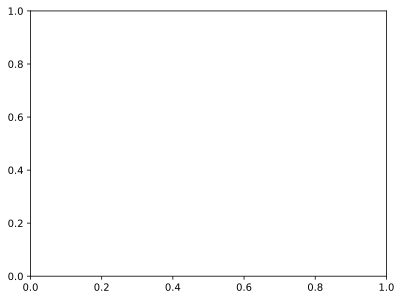

In [4]:
# Start from the most basic figure
fig, ax = plt.figure(), plt.axes()

See that the default canvas has not ratio 1 (squared). We can define `figsize` for the figure and axes dimensions but we can also use `set_aspect` method.

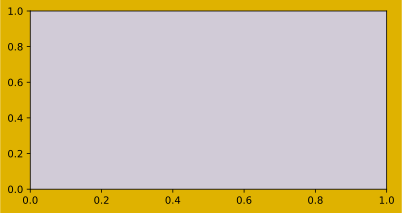

In [5]:
fig, ax = plt.figure(facecolor='#DFB200'), plt.axes(facecolor='#D1CBD7')
# ax.set_aspect('equal')
ax.set_aspect(0.5)

Usually we leave matplotlib to define the limits of the axes. (Calculated based on the data we pass trough) But it is possible to define them:
* `set_xlim()`
* `set_ylim()`

👁️ Messing around with this limits can make data dissapear.<br>
We can also retrieve those automate limits by using this methods:
* `get_xlim()`
* `get_ylim()`

Le us play around with this methods, creating colour filled areas with `fill_between()` method.

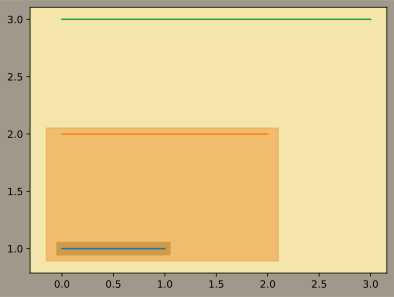

In [6]:
fig, ax = plt.figure(facecolor='#9F998B'), plt.axes()
colors_list = ['#9F998B','#F2884B','#DFB200','#D1CBD7']

for i in range(1,4):
  j = i -1
  ax.plot([0,i],[i,i])
  bottom_y, top_y = ax.get_ylim()
  left_x, right_x = ax.get_xlim()
  ax.fill_between(x=[left_x,right_x],
                  y1 = bottom_y,
                  y2 = top_y,
                  alpha = 1/i,
                  color=colors_list[j])

# The last iteration stretches automatically limits
# Avoid it
ax.set_ylim(bottom_y, top_y)
ax.set_xlim(left_x,right_x); # ; eliminates the numbers and text in the console

In case we need to, we can make our plot elements to break past the limits of the axes. Inside the function `ax.plot()` we can toggle `clip_on = False`. This argument controls how the objects behave respect the limits.

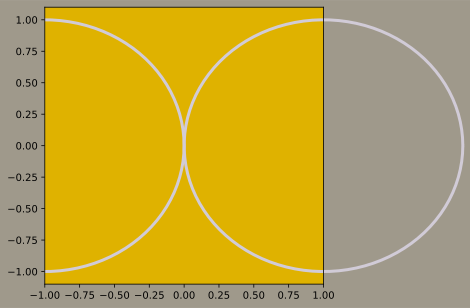

In [7]:
fig, ax = plt.figure(figsize=(5,5), facecolor='#9F998B'), plt.axes(facecolor='#DFB200')

# Create a circle
u = np.linspace(0,2*np.pi, 100)
x = np.cos(u)
y = np.sin(u)

ax.plot(x-1,y,color='#D1CBD7', linewidth=3)
ax.plot(x+1,y,color='#D1CBD7', linewidth=3, clip_on=False)

ax.set_xlim(-1,1); # Force the circle to be out the limits


In this case you can see that the figure container adapts itself to the data. Even if we set the figsize previuosly. But the axis limits remain set as (-1,1)

### Spines: Axis Lines and Labels

We, of course, can change (even make disappear) the lines that define axis.
With `ax.axis('off')` we just eliminate everything but the figure

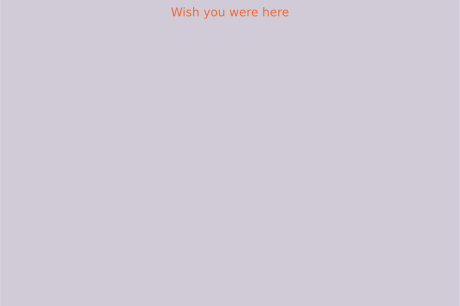

In [8]:
fig, ax = plt.figure(figsize=(8,5), facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.set_title('Wish you were here', color='#F26835')
ax.axis('off');

Of course we can access and change each spine individually.

Using `ax.spines.set_visible(False)`

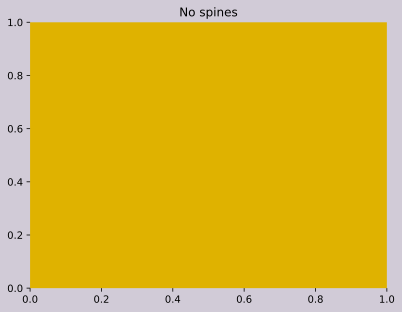

In [9]:
fig, ax = plt.figure(facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.set_title('No spines')
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_visible(False)

There are some other methods to work with spines:
* `set_position()`
* `set_color()`
* `set_linewidth()`

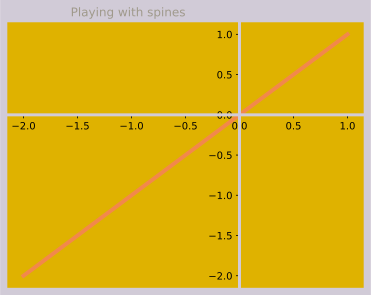

In [10]:
fig, ax = plt.figure(facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.set_title('Playing with spines', fontdict={'fontsize':12, 'color':'#9F998B', 'horizontalalignment':'right'})
ax.plot([-2,1], [-2,1], color='#F2884B', linewidth=4)
for spine in 'top', 'right':
  ax.spines[spine].set_visible(False)
for spine in 'bottom', 'left':
  ax.spines[spine].set_position('zero')
  ax.spines[spine].set_color('#D1CBD7')
  ax.spines[spine].set_linewidth(3);

plt.savefig('spines.pdf');

### Ticks: what the spines measure

There are two ways for access and change the info display in the ticks (the ticks and its labels). The first ones should apply direct to as ax.:
* `set_xticks`
* `set_xtickslabels`

And, of course, we can use the general:
* `set_ticks`
* `set_ticklabels`


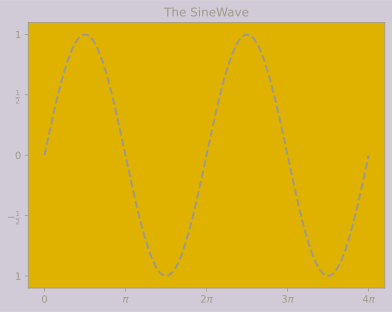

In [11]:
# Create a wave line
x = np.linspace(0, np.pi * 4, 100)

fig, ax = plt.figure(facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.plot(x, np.sin(x), color='#9F998B', linewidth=2, linestyle='dashed')
ax.set_title('The SineWave', color='#9F998B')

for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#9F998B')
ax.xaxis.set_tick_params(color='#9F998B')
ax.yaxis.set_tick_params(color='#9F998B')

# X Ticks
ax.xaxis.set_ticks([0,np.pi,np.pi*2,np.pi*3, np.pi*4])
ax.xaxis.set_ticklabels([0,r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'], color='#9F998B')

# Y Ticks
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_yticklabels([1, r'$-\frac{1}{2}$', 0, r'$\frac{1}{2}$', 1], color='#9F998B');

# Save vector PDF
plt.savefig('theSineWave.pdf');

For the special mathematical characters I am using [LaTeXStrings](https://juliadatascience.io/using-latexstrings.jl)

When you pass an empty array to `set_ticks()` there are no ticks.

There is also a way to get two levels of tiks, *majors*, and *minors* (these ones are deactivated by default)


In [12]:
"""
Before plotting we are going to create a small dataset.
With temporary stats of the Week 15 NFL game:
Minnesota Vikings at Cincinnaty Bengals
16/12/2023
3:05 pm ET
"""
minVikings_colors = ['#4F2683', '#FFC62F']
cinBengals_colors = ['#FB4F14', '#000000']

runningStats = {
    'Name': ['T.Chandler', 'N.Mullens', 'K.Nwangwu', 'C.Brown', 'J.Mixon', 'T.Williams'],
    'Runs': [16, 3, 1, 5, 4, 1],
    'Yards': [87, 5, 1, 14, 23, 10]
}

df = pd.DataFrame(runningStats)

# Add a column with the average yards per run
df['Avg'] = round(df['Yards']/df['Runs'], 1)
# Asign teams
df['Team'] = ['Min','Min','Min','Cin','Cin','Cin']

# Asign color_1 and color_2 to each player
df['colors_1'] = df['Team'].apply(lambda x: minVikings_colors[0] if x == 'Min' else cinBengals_colors[1])
df['colors_2'] = df['Team'].apply(lambda x: minVikings_colors[1] if x == 'Min' else cinBengals_colors[0])

df_Avg = df[['Name', 'Avg']]
df = df.sort_values(by='Avg')
df, df_Avg


(         Name  Runs  Yards   Avg Team colors_1 colors_2
 2   K.Nwangwu     1      1   1.0  Min  #4F2683  #FFC62F
 1   N.Mullens     3      5   1.7  Min  #4F2683  #FFC62F
 3     C.Brown     5     14   2.8  Cin  #000000  #FB4F14
 0  T.Chandler    16     87   5.4  Min  #4F2683  #FFC62F
 4     J.Mixon     4     23   5.8  Cin  #000000  #FB4F14
 5  T.Williams     1     10  10.0  Cin  #000000  #FB4F14,
          Name   Avg
 0  T.Chandler   5.4
 1   N.Mullens   1.7
 2   K.Nwangwu   1.0
 3     C.Brown   2.8
 4     J.Mixon   5.8
 5  T.Williams  10.0)

Let us create a horizontal bar chart, with the average yards for the six players. And we are going to play also with the bar objects.

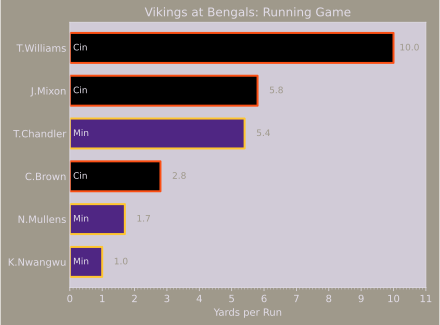

In [13]:
fig, ax = plt.figure(facecolor='#9F998B'), plt.axes(facecolor='#D1CBD7')

df['Avg'].plot.barh(ax = ax,
             color = df['colors_1'],
             edgecolor= df['colors_2'],
             linewidth = 2,
             width = 0.7)

ax.yaxis.set_tick_params(length=0, which='major', rotation = 0)
ax.set_yticklabels(df['Name'], color='#E1DCE7')

for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#E1DCE7')

xlim0, xlim1 = 0, round(df['Avg'].max()) + 1
ax.set_xlim([xlim0 , xlim1])
ax.set_xticks(range(xlim0, xlim1 + 1))
# Change both the ticks and ticklabels color
ax.tick_params(axis='x', colors='#E1DCE7')

ax.xaxis.set_minor_locator(MultipleLocator(1/10))
ax.xaxis.set_tick_params(length=2, which='minor', color='#D1CBD7')
ax.set_xlabel('Yards per Run', color='#E1DCE7')
ax.set_title('Vikings at Bengals: Running Game', color='#E1DCE7');

# Adding the avergae number for each player
for i, v in enumerate(df['Avg']):
    ax.text(v + 0.8, i, str(round(v, 2)), color='#9F998B', va='center', ha='right', fontsize=9)
for i, team in enumerate(df['Team']):
    ax.text(0.1, i, team, color='#E1DCE7', va='center', ha='left', fontsize=9)

# Save the vector PDF
plt.savefig('runsAVG.pdf');

Before start playing with titles, fonts and other styles configuration there is one more style we can use in our charts:

 **Grids**

 Method for both axis is `grid()`
 For individually change any of both:

 * `yaxis.grid()`
 * `xaxis.grid()`

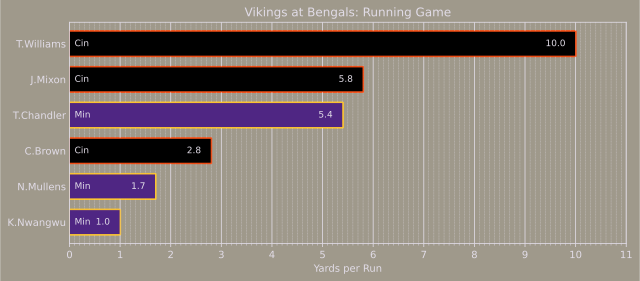

In [14]:
fig, ax = plt.figure(figsize=(10,4), facecolor='#9F998B'), plt.axes(facecolor='#9F998B')

df['Avg'].plot.barh(ax = ax,
             color = df['colors_1'],
             edgecolor= df['colors_2'],
             linewidth = 2,
             width = 0.7)



for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#E1DCE7')

xlim0, xlim1 = 0, round(df['Avg'].max()) + 1
ax.set_xlim([xlim0 , xlim1])
ax.set_xticks(range(xlim0, xlim1 + 1))
# Change both the ticks and ticklabels color
ax.tick_params(axis='x', colors='#E1DCE7')

ax.xaxis.set_minor_locator(MultipleLocator(1/10))
df['Avg'].plot.barh(ax=ax,
                    color=df['colors_1'],
                    edgecolor=df['colors_2'],
                    linewidth=1,
                    width=0.7, # Increase this value to make the bars wider
                    zorder=2)

ax.yaxis.set_tick_params(length=0, which='major', rotation = 0)
ax.set_yticklabels(df['Name'], color='#E1DCE7')

ax.xaxis.grid(True, which='major', color='#E1DCE7', linestyle='-', zorder=1)
ax.xaxis.grid(True, which='minor', color='#E1DCE7', linestyle='--', linewidth=0.3, zorder=1)

ax.xaxis.set_tick_params(length=2, which='minor', color='#D1CBD7')
ax.set_xlabel('Yards per Run', color='#E1DCE7')
ax.set_title('Vikings at Bengals: Running Game', color='#E1DCE7')

# Adding the average number for each player
for i, v in enumerate(df['Avg']):
    ax.text(v - 0.2, i, str(round(v, 2)), color='#E1DCE7', va='center', ha='right', fontsize=9, zorder=4)
for i, team in enumerate(df['Team']):
    ax.text(0.1, i, team, color='#E1DCE7', va='center', ha='left', fontsize=9,  zorder=4)

# Save the vector PDF
plt.savefig('runsAVG_Grid.pdf')

### Maybe it worth a thousand words, or not...

Set, inside matplotlib, the fonts that we have uploaded before to the environment, at the beginning of this notebook

In [15]:
# using font_manager() to get fonts into matplotlib
from matplotlib import font_manager

# font_manager.fontManager.addfont('/content/GOTHIC.TTF')  # replace with the path to your font file
# font_manager.fontManager.addfont('/content/GOTHICB.TTF')
# font_manager.fontManager.addfont('/content/GOTHICBI.TTF')
# font_manager.fontManager.addfont('/content/GOTHICI.TTF')
font_manager.fontManager.addfont('/content/DINPro-Black.otf')
font_manager.fontManager.addfont('/content/DINPro-Bold.otf')
font_manager.fontManager.addfont('/content/DINPro-Light.otf')
font_manager.fontManager.addfont('/content/DINPro-Medium.otf')
font_manager.fontManager.addfont('/content/DINPro-Regular.otf')

And now, we are going to plot with our uploaded font. We can set thje entire envornment with:
<br> `plt.rcParams['font.family'] = 'Century Gothic'`

Or using `fontproperties='Century Gothic'` in which instances we want.

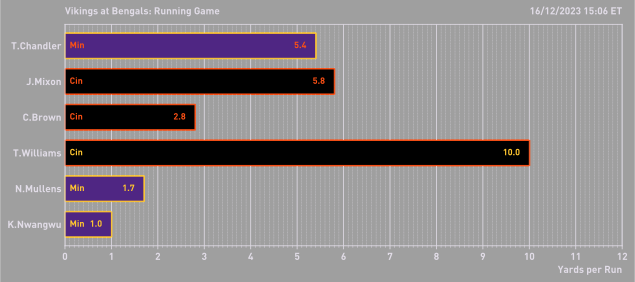

In [16]:
from matplotlib.font_manager import FontProperties

df = df.sort_values(by='Yards')
fig, ax = plt.figure(figsize=(10,4), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

df['Avg'].plot.barh(ax = ax,
             color = df['colors_1'],
             edgecolor= df['colors_2'],
             linewidth = 2,
             width = 0.7)

plt.rcParams['font.family'] = 'DINPro'
plt.rcParams['font.weight'] = 'bold'
font = FontProperties()
font.set_family('Century Gothic')
font.set_weight('bold')

font2 = FontProperties()
font2.set_family('DINPro')
font2.set_weight('bold')

for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#E1DCE7')

xlim0, xlim1 = 0, round(df['Avg'].max()) + 1
ax.set_xlim([xlim0 , xlim1])
ax.set_xticks(range(xlim0, xlim1 + 2))
# Change both the ticks and ticklabels color
ax.tick_params(axis='x', colors='#E1DCE7')
for label in ax.get_xticklabels():
    label.set_fontproperties(font2)

ax.xaxis.set_minor_locator(MultipleLocator(1/10))
df['Avg'].plot.barh(ax=ax,
                    color=df['colors_1'],
                    edgecolor=df['colors_2'],
                    linewidth=1,
                    width=0.7, # Increase this value to make the bars wider
                    zorder=2)

ax.yaxis.set_tick_params(length=0, which='major', rotation = 0)
ax.set_yticklabels(df['Name'], color='#E1DCE7', fontproperties=font2)

ax.xaxis.grid(True, which='major', color='#E1DCE7', linestyle='-', zorder=1)
ax.xaxis.grid(True, which='minor', color='#E1DCE7', linestyle='--', linewidth=0.3, zorder=1)

ax.xaxis.set_tick_params(length=2, which='minor', color='#D1CBD7')
ax.set_xlabel('Yards per Run', color='#E1DCE7', loc='right', fontproperties=font2)
ax.set_title('Vikings at Bengals: Running Game',
             color='#E1DCE7',
             pad=10, # Added some padding to separate from top spine
             loc='Left', # Moving title to the left
             fontsize=10,
             fontproperties=font2
             )
# Add another title in the right side
ax.set_title('16/12/2023 15:06 ET',
             color='#E1DCE7',
             loc='right',
             pad=10,
             fontsize=10,
             fontproperties=font2)
# Adding the average number for each player
for i, v in enumerate(df['Avg']):
    ax.text(v - 0.2, i, str(round(v, 2)), color=df['colors_2'][i], va='center', ha='right',
            fontsize=9, zorder=4, fontproperties=font2)
for i, team in enumerate(df['Team']):
    ax.text(0.1, i, team, color=df['colors_2'][i], va='center', ha='left',
            fontsize=9,  zorder=4, fontproperties=font2)

# Save the vector PDF
plt.savefig('runsAVG_SomeText.pdf')

👁️ **NOTE:** We can rotate the text with `rotate = angle` inside any text instance. Just remember that a supposedly 45 grade angle is relative of the ratio between x and y.


### Numbers are just not numbers...

In this interlude we are getting this kind of table of how can we format numbers in several ways.

In [17]:
# Code                            # Output

'{:,}'.format(10**6)              # 1,000,000
'{:,.2f} €'.format(10**6)         # 1,000,000.00 €
'{:0>3.0f}'.format(3)             # 003
'{:>3.0f}'.format(1)              #   1 (three blank spaces before number)
'€{:0>4.0f}'.format(1)            # €0001
'{:+,.1f}'.format(1000)           # +1,000.0
'{:0<+4,.1f}'.format(-1)          # -1.0
'{:0<5.0f}'.format(1)             # 10000
'{:0<5,.0f}'.format(1)            # 10000
'{:0<8,.0f}'.format(1000)         # 1,000000
'{:.0e}'.format(10, 1**6)         # 1e+01
'{:.1f} and {:.1f}'.format(9, 1)  # 9.0 and 1.0
'{1:.1f} and {0:.1f}'.format(9, 1)# 1.0 and 9.0
'{0:} and {0:}'.format(1)         # 1 and 1


'1 and 1'

A format specifier is a string that can speciffy fill, align, width, grouping option, precision and type.

`[[fill]align][sign][#][0][width][grouping_option][.precision][type]`

### Read multi-data: the legends

Legends provide a key to better read the colors and symbols contained in a plot.

`legend()` can be used to generate legend, as either a figure or axes methods.

`ax.legend(), fig.legend()`

For now, we are going to work with the axes legend. Before creating `legend()` we need to define labels for our plot elements (artist objects)

We can add this two ways:
* Through the `label` parameter inside plot function.
* Using `set_label()` method. (Before using this method is necessary to define the plot object)

Let's see this two ways in this simple example:

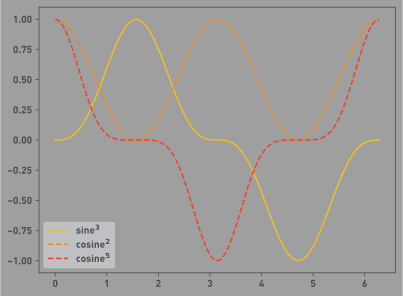

In [18]:
fig, ax = plt.figure(facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#4A4B4C')
ax.tick_params(axis='y', colors='#4A4B4C')

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#4A4B4C')

# Set x as a set of points
x = np.linspace(0, 2*np.pi, 100)

# Label inside plot function
ax.plot(x, np.sin(x)**3, label=r'sine$^3$', color='#EBBD2A')

# Label using artist object (set_label() method)
cos, = ax.plot(x, np.cos(x)**2, color='#EB892A', linestyle='dashed')
cos.set_label(r'cosine$^2$')

cos5, = ax.plot(x, np.cos(x)**5, color='#EB452A', linestyle='dashed')
cos5.set_label(r'cosine$^5$')

ax.legend(facecolor='#C6C8CB', labelcolor='#4A4B4C')

# Save the vector PDF
plt.savefig('sineCosineLegend.pdf');

We can decide to not show the legend of one object using `'_nolegend_'` as the artist object label

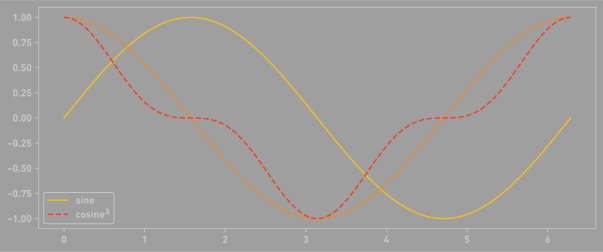

In [19]:
fig, ax = plt.figure(figsize = (10, 4), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#C6C8CB')
ax.tick_params(axis='y', colors='#C6C8CB')

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#C6C8CB')

# Set x as a set of points
x = np.linspace(0, 2*np.pi, 100)

# Label inside plot function
ax.plot(x, np.sin(x), label='sine', color='#EBBD2A')

# Label using artist object (set_label() method)
cos, = ax.plot(x, np.cos(x), color='#EB892A', linestyle='dashed')
cos.set_label('_nolegend_')

cos5, = ax.plot(x, np.cos(x)**3, color='#EB452A', linestyle='dashed')
cos5.set_label(r'cosine$^3$')

ax.legend(facecolor='#9F9F9F', labelcolor='#C6C8CB')

# Save the vector PDF
plt.savefig('sineCosineNoLegend.pdf');

Besides de `loc=` [positions](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) (including 'best') we can use also the method:
* `bbox_to_anchor` giving x, y position
* `bbox_transform` were we can place legend in other coordinate system

For the goodness of design, most of the time the besto choice is to keep `matplotlib` choosing the 'best' position.

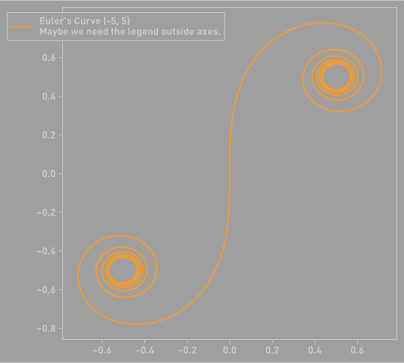

In [20]:
from scipy.special import fresnel

fig, ax = plt.figure(figsize = (6, 6), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#C6C8CB')
ax.tick_params(axis='y', colors='#C6C8CB')

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#C6C8CB')

# Set x as a set of points
x = np.linspace(-5, 5, 1000)


# Label using artist object (set_label() method)
euler, = ax.plot(*fresnel(x), color='#F29B30')
euler.set_label("Euler's Curve (-5, 5)\nMaybe we need the legend outside axes.")

ax.legend(bbox_to_anchor=(0.5,1), facecolor='#9F9F9F', labelcolor='#C6C8CB')

# Save the vector PDF
plt.savefig('EulerLegend.pdf');

There are some more params to change the appearance of the legend box (in the previous examples we've been using some):<br>
`ncol, edgecolor, shadow, title` , etc.<br>
(See matplotlib documentation for more)

👁️**NOTE:** The curves used for the next example are taken from the book [Learning Scientific Programming with Python](https://scipython.com/about/the-book/) by Christian Hill

Let's see how to annotate the lines, avoiding using a legend.

First we are going to recreate the curve of 'A quantum particle in a gravitational field'

In [21]:
from scipy.special import airy, ai_zeros

nmax = 16

# Find the first nmax zeros of Ai(x)
a, _, _, _ = ai_zeros(nmax)
# The actual boundary condition is Ai(-qE) = 0 at q=0, so:
qE = -a

def prob_qm(n, dq):
    """
    Return the quantum mechanical probability density for a particle moving
    in a uniform gravitational field.

    """
    # The quantum mechanical wavefunction is proportional to Ai(q-qE) where
    # the qE corresponding to quantum number n is indexed at n-1
    psi, _, _, _ = airy(q-qE[n-1])
    # Return the probability density, after rough-and-ready normalization
    P = psi**2
    return P / (sum(P) * dq)

def prob_cl(n):
    """
    Return the classical probability density for a particle bouncing
    elastically in a uniform gravitational field.

    """
    # The classical probability density is already normalized
    return 0.5/np.sqrt(qE[n-1]*(qE[n-1]-q))


# The ground state, n=1
# q, dq = np.linspace(0, 4, 1000, retstep=True)

# An excited state, n=16
#q, dq = np.linspace(0, 20, 1000, retstep=True)

<ipython-input-21-609f02528ba8>:30: RuntimeWarning: invalid value encountered in sqrt
  return 0.5/np.sqrt(qE[n-1]*(qE[n-1]-q))


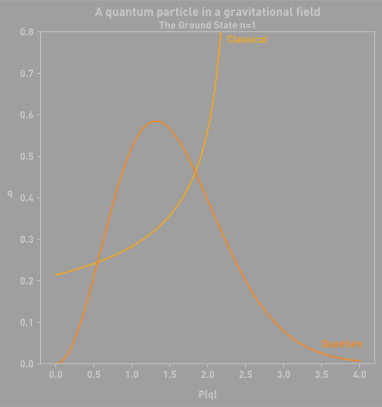

In [22]:
# The ground state, n=1
q, dq = np.linspace(0, 4, 1000, retstep=True)

fig, ax = plt.figure(figsize = (6, 6), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#C6C8CB')
ax.tick_params(axis='y', colors='#C6C8CB')
ax.set_ylim(0,0.8)

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#C6C8CB')


# Label using artist object (set_label() method)
(classical,) = ax.plot(q, prob_cl(1), color='#EBA62A')
classical.set_label('Classical')

(quantum,) = ax.plot(q, prob_qm(1, dq), color='#EB892A')
quantum.set_label('Quantum')

ax.set_xlabel('P(q)', color='#C6C8CB', fontweight='bold', labelpad=10)
ax.set_ylabel('q', color='#C6C8CB', fontweight='bold', rotation=0, labelpad=10)
ax.set_title('A quantum particle in a gravitational field', color='#C6C8CB', ha='center', fontweight='bold', fontsize=12, y=1.03)
# Use x.text to add a subtitle (the x value is between 0, 1 -> 0.5 fits the middle)
ax.text(0.5, 1.01, s='The Ground State n=1', ha= 'center', transform = ax.transAxes,  color='#C6C8CB', fontsize=10)
ax.text(2.25, .78,
        s = 'Classical',
        va = 'center',
        color = '#EBA62A',
        size = 10)
ax.text(q[-1]-0.5, prob_qm(1, dq)[-1]+ 0.04,
        s = 'Quantum',
        va = 'center',
        color = '#EB892A',
        size = 10)

# Save the vector SVG
plt.savefig('quantumGravitational.svg');

Let's see the graph in an excited state, when n=16.

In this case we are going to use the `annotate` method instead of a `text` artist object

<ipython-input-21-609f02528ba8>:30: RuntimeWarning: invalid value encountered in sqrt
  return 0.5/np.sqrt(qE[n-1]*(qE[n-1]-q))


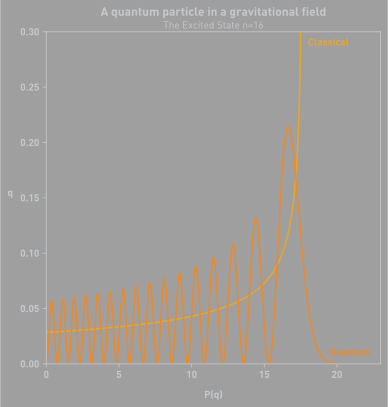

In [23]:
# An excited state, n=16
q, dq = np.linspace(0, 20, 1000, retstep=True)

fig, ax = plt.figure(figsize = (6, 6), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#C6C8CB')
ax.tick_params(axis='y', colors='#C6C8CB')
ax.set_xlim(0,23)
ax.set_ylim(0,0.3)

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#C6C8CB')


# Label using artist object (set_label() method)
(classical,) = ax.plot(q, prob_cl(16), color='#EBA62A')
classical.set_label('Classical')

(quantum,) = ax.plot(q, prob_qm(16, dq), color='#EB892A')
quantum.set_label('Quantum')

ax.set_xlabel('P(q)', color='#C6C8CB', fontweight='bold', labelpad=10)
ax.set_ylabel('q', color='#C6C8CB', fontweight='bold', rotation=0, labelpad=10)
ax.set_title('A quantum particle in a gravitational field', color='#C6C8CB', ha='center', fontsize=12, fontweight='bold', y=1.03)
# Use x.text to add a subtitle (the x value is between 0, 1 -> 0.5 fits the middle)
ax.text(0.5, 1.01, s='The Excited State n=16', ha= 'center', transform = ax.transAxes, fontweight='regular',  color='#C6C8CB', fontsize=10)
ax.annotate('Classical',
            xy=(18, .29),
            va = 'center',
            color = '#EBA62A',
            size = 10)
ax.annotate('Quantum',
            xy=(q[-1]-0.5, prob_qm(1, dq)[-1]+0.01),
            va = 'center',
            color = '#EB892A',
            size = 10)

# Save the vector SVG, usaing bbox_inches we control how much margin plt.savefig is adding to the outputfile
plt.savefig('quantumExcitedGravitational.svg', bbox_inches='tight');

💊💊💊Just an interlude to see how to change the color of each word in a sentence

Bounding box for 'Why': Bbox(x0=0.33618951612903225, y0=0.6735389610389612, x1=0.6638104838709677, y1=0.8764610389610391)
Bounding box for 'so': Bbox(x0=0.41229838709677424, y0=0.47353896103896087, x1=0.5877016129032259, y1=0.6764610389610388)
Bounding box for 'many': Bbox(x0=0.29170866935483875, y0=0.273538961038961, x1=0.7082913306451613, y1=0.476461038961039)
Bounding box for 'colors?': Bbox(x0=0.21685987903225803, y0=0.07353896103896093, x1=0.783140120967742, y1=0.2764610389610389)


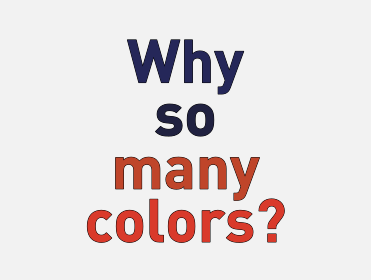

In [24]:
import matplotlib.patheffects as pe

fig, ax = plt.subplots(facecolor="#F2F2F2")
ax.axis("off")
tColors = ["#252759", "#202140", "#BF452A", "#D93A2B"]
tLabels = ["Why", "so", "many", "colors?"]

center_x, center_y = 0.5, 0.5  # Center of the figure
delta = 0.05  # Small adjustment to prevent overlap

for i, (label, color) in enumerate(zip(tLabels, tColors)):
    text = ax.text(
        center_x,
        center_y - 4 * i * delta + 0.275,
        label,
        color=color,
        ha="center",
        fontsize=60,
        va="center",
    )
    text.set_path_effects([pe.withStroke(linewidth=1, foreground="k")])

    # Get the bounding box of the text in display coordinates
    bbox_display = text.get_window_extent()

    # Convert the bounding box to data coordinates
    bbox_data = ax.transData.inverted().transform_bbox(bbox_display)

    # Print the bounding box to the console
    print(f"Bounding box for '{label}': {bbox_data}")


plt.savefig('WhySoMuchColors.pdf', bbox_inches='tight')
plt.show();

### Times set Times

It is very common the need to handle dates in our plots. With `matplotlib`we can use the cappabilites of the `datetime`and `dateutil` modules.

When we deal with timestamp DataFrame data, matplotlib hadle this very well, but it is possible to improve with the necessary format

In [25]:
# Let's use some timebased data
url = "https://raw.githubusercontent.com/alvarohernandezalt/matplotlib_thePathof/main/data/hrp_state.csv"
df = pd.read_csv(url)
df.iloc[1012]

OP_NOMBRE             17254_CPLAPROVIDENCIA21
TIPOLOGIA                          ENVOLVENTE
ESTADO_SEGUIMIENTO           11 NO ADJUDICADO
fecha_RRR                    2017-12-01 00:00
Importe_MAX                         €61892,29
Name: 1012, dtype: object

In [26]:
df['fecha_RRR'] = pd.to_datetime(df['fecha_RRR'], format='%Y/%m/%d %H:%M')

In [27]:
df_clean = df.drop_duplicates(subset='fecha_RRR')
df_clean

,OP_NOMBRE,TIPOLOGIA,ESTADO_SEGUIMIENTO,fecha_RRR,Importe_MAX
0,23247_CPVILLAMANIN37,ENVOLVENTE,11 NO ADJUDICADO,2023-09-04 11:01:00,"€353124,08"
1,23248_ALVEARCABRERASL,REHABILITACION,03 ENTREGADO - ACTIVO,2023-09-04 13:47:00,"€1444230,00"
2,23252_CPGENERALRICARDOS69,ENVOLVENTE,11 NO ADJUDICADO,2023-09-05 13:19:00,"€364988,04"
3,23253_ACTIVIDADESHOTELERASSANTATERESASL,REHABILITACION,02 EN ESTUDIO,2023-09-06 07:43:00,"€1248027,30"
4,23254_REATILCOMPANY2021SLU,FACHADA,04 ENTREGADO - INACTIVO,2023-09-06 18:28:00,"€59955,70"
...,...,...,...,...,...
2650,21289_CPGOBELENA10,FACHADA,10 NO HACEN OBRA,2022-12-14 00:00:00,"€121434,39"
2651,19195_CPHEROS7,REHABILITACION,08 CONTRATADO,2019-07-02 00:00:00,"€513392,96"
2657,19013_PROPIEDAD,REHABILITACION,11 NO ADJUDICADO,2018-11-16 00:00:00,"€2056114,84"
2660,18395_CPDOLORESALMEDA13,REHABILITACION,10 NO HACEN OBRA,2018-03-05 00:00:00,"€1486,45"


In [28]:
df_2023 = df_clean[df_clean['fecha_RRR'].dt.year == 2023]
df_2023


,OP_NOMBRE,TIPOLOGIA,ESTADO_SEGUIMIENTO,fecha_RRR,Importe_MAX
0,23247_CPVILLAMANIN37,ENVOLVENTE,11 NO ADJUDICADO,2023-09-04 11:01:00,"€353124,08"
1,23248_ALVEARCABRERASL,REHABILITACION,03 ENTREGADO - ACTIVO,2023-09-04 13:47:00,"€1444230,00"
2,23252_CPGENERALRICARDOS69,ENVOLVENTE,11 NO ADJUDICADO,2023-09-05 13:19:00,"€364988,04"
3,23253_ACTIVIDADESHOTELERASSANTATERESASL,REHABILITACION,02 EN ESTUDIO,2023-09-06 07:43:00,"€1248027,30"
4,23254_REATILCOMPANY2021SLU,FACHADA,04 ENTREGADO - INACTIVO,2023-09-06 18:28:00,"€59955,70"
...,...,...,...,...,...
2541,23197_CPSANTODOMINGO5,ENVOLVENTE,03 ENTREGADO - ACTIVO,2023-05-15 00:00:00,"€198514,84"
2588,23109_CPCABESTREROS9,REHABILITACION,11 NO ADJUDICADO,2023-03-24 00:00:00,"€84671,61"
2591,23291_CPREGALESKALEA19,FACHADA,03 ENTREGADO - ACTIVO,2023-09-27 06:25:00,"€61882,22"
2617,23241_PROPIEDAD,REHABILITACION,11 NO ADJUDICADO,2023-07-06 00:00:00,"€1410714,18"


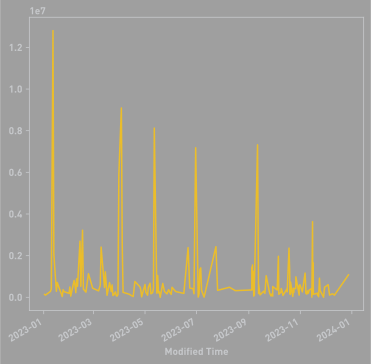

In [29]:
fig, ax = plt.figure(figsize = (6, 6), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#C6C8CB')
ax.tick_params(axis='y', colors='#C6C8CB')


# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#C6C8CB')


df = df_2023.drop(columns=['ESTADO_SEGUIMIENTO', 'OP_NOMBRE', 'TIPOLOGIA'])
df['Importe_MAX'] = df['Importe_MAX'].replace({'€': '', ',': '.'}, regex=True).astype(float)
df.set_index('fecha_RRR').plot(ax=ax, color='#EBBD2A')
ax.legend().set_visible(False)
ax.set_xlabel('Modified Time', color='#C6C8CB', fontproperties=font2);

We can assure that we get the right format of our dates and the periodicity of them using `matplotlib.dates` and `matplotlib.tickers`.

* [dates](https://matplotlib.org/stable/api/dates_api.html)
* [ticker](https://matplotlib.org/stable/api/ticker_api.html)

(See the references for more info)

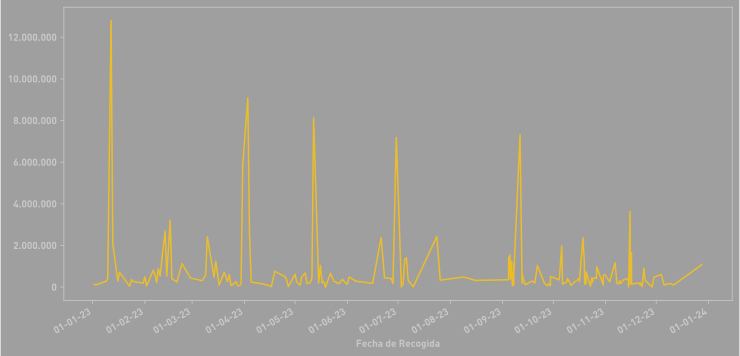

In [30]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.figure(figsize = (12, 6), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#C6C8CB')
ax.tick_params(axis='y', colors='#C6C8CB')

# Define formatter for date
xformatter = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1]))

# Define a custom formatter function
def custom_formatter(x, pos):
    return format(int(x), ',').replace(',', '.')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))


# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#C6C8CB')



df['Importe_MAX'] = df['Importe_MAX'].replace({'€': '', ',': '.'}, regex=True).astype(float)

df.set_index('fecha_RRR').plot(ax=ax, color='#EBBD2A')
ax.legend().set_visible(False)


ax.set_xlabel('Fecha de Recogida', color='#C6C8CB', fontproperties=font2);
ax.xaxis.set_major_formatter(xformatter)


### Multiplicity over multiplicity

**Multiple Axes**

It is possible to use several x-axes or y-axes to unify plots with different value scales in a single view.

We have this tools to add more axes to our plot
* `twinx()` Create another y axis (both of them sharing x axis)
* `twiny()` Create ather x axis (both sharing y axis)

Let's see first a Wishart Random Variable curve, and then enhance it using multiple axes.

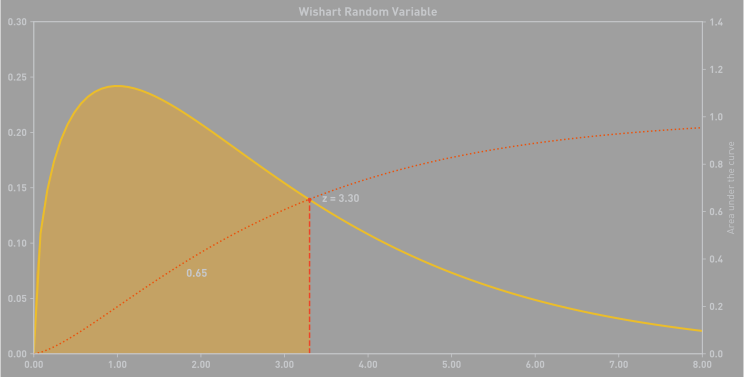

In [31]:
from scipy.stats import wishart, chi2
from scipy.integrate import quad
from matplotlib.ticker import FuncFormatter


fig, ax = plt.figure(figsize = (12, 6), facecolor='#9F9F9F'), plt.axes(facecolor='#9F9F9F')

# Change the params of both ticks and ticklegend
ax.tick_params(axis='x', colors='#C6C8CB')
ax.tick_params(axis='y', colors='#C6C8CB')

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax.spines[spine].set_color('#C6C8CB')

ax.set_xlim(0.0,8.0)
ax.set_ylim(0,0.3)

formatter = FuncFormatter(lambda x, pos: "{:.2f}".format(x))
ax.xaxis.set_major_formatter(formatter)


scale_matrix = np.array([[1]])

x = np.linspace(1e-5, 8, 100)
w = wishart.pdf(x, df=3, scale=scale_matrix); w[:5]

ax.plot(x,w,color='#EBBD2A', linewidth=2)
ax.set_title('Wishart Random Variable', color='#C6C8CB', fontproperties=font2, fontsize=12)

# Set a point
z = 3.30
pdfz= wishart.pdf(z, df=3, scale=scale_matrix)
ax.plot([z,z],
       [0,pdfz],
       color='#EB452A',
       linestyle='dashed')
ax.plot(z,pdfz,color='#EB452A',marker='.',)
ax.text(z + .15, pdfz - 0.002,
        s='z = {:.2f}'.format(z), color='#C6C8CB', size = 11)

# Fill the area
x_vals = np.linspace(1e-5, z, 100)
pdfx_vals = wishart.pdf(x_vals, df=3, scale=scale_matrix); w[:5]
ax.fill_between(x_vals,
                np.zeros(100),
                pdfx_vals,
                color='#EBA62A',
                alpha=.5)

# Calculate the area and put a text with its value
def pdf(x):
  return wishart.pdf(x, df=3, scale=scale_matrix)

area, error = quad(pdf, 1e-5, z)

# Existing code
ax2 = ax.twinx()  # Create a second y-axis


ax2.tick_params(axis='y', colors='#C6C8CB')

ax2.xaxis.set_major_formatter(formatter)


# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax2.spines[spine].set_color('#C6C8CB')

# Calculate the areas for all z values and plot them
areas = [quad(pdf, 1e-5, z_val)[0] for z_val in x]
ax2.plot(x, areas, color='#E9530D', linestyle='dotted')

# Set the y-label for the second y-axis
ax2.set_ylabel('Area under the curve', color='#C6C8CB')


# Calculate the scaling factor
scale_factor =  0.65 / 0.13918138075553632

# Get the current y-limits of the primary axis
ymin, ymax = ax.get_ylim()

# Set the y-limits of the secondary axis using the scaling factor
ax2.set_ylim(ymin * scale_factor, ymax * scale_factor)

ax.text(z/2 + .3, pdfz/2,
        s='{:.2f}'.format(area),
        fontproperties=font2,
        size = 11,
        color='#C6C8CB',
        ha='center');

plt.savefig('WishartRandomVariable.pdf', bbox_inches='tight')


**Multiple plots: multiple methods**

We have several ways of adding several subplots to a figure:

* `plt.subplots`
* `fig.add_subplot`

It is handy to stablish subplots as a matrix with this method:
* `fig, ax = plt.subplots()`

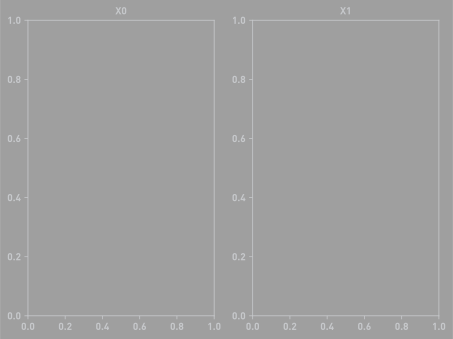

In [32]:
fig, ax = plt.subplots(1,2, facecolor='#9F9F9F')
ax[0].set_title('X0', color='#C6C8CB', fontproperties=font2)
ax[1].set_title('X1', color='#C6C8CB', fontproperties=font2)

ax[0].set_facecolor('#9F9F9F')
ax[1].set_facecolor('#9F9F9F')

# Change the params of both ticks and ticklegend
ax[0].tick_params(axis='x', colors='#C6C8CB')
ax[0].tick_params(axis='y', colors='#C6C8CB')
ax[1].tick_params(axis='x', colors='#C6C8CB')
ax[1].tick_params(axis='y', colors='#C6C8CB')

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax[0].spines[spine].set_color('#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
  ax[1].spines[spine].set_color('#C6C8CB')

plt.tight_layout()

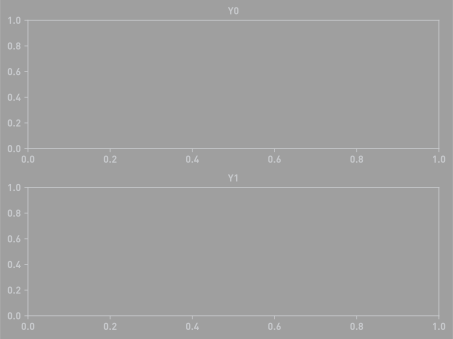

In [33]:
fig, ax = plt.subplots(2,1, facecolor='#9F9F9F')
ax[0].set_title('Y0', color='#C6C8CB', fontproperties=font2)
ax[1].set_title('Y1', color='#C6C8CB', fontproperties=font2)

ax[0].set_facecolor('#9F9F9F')
ax[1].set_facecolor('#9F9F9F')

# Change the params of both ticks and ticklegend
ax[0].tick_params(axis='x', colors='#C6C8CB')
ax[0].tick_params(axis='y', colors='#C6C8CB')
ax[1].tick_params(axis='x', colors='#C6C8CB')
ax[1].tick_params(axis='y', colors='#C6C8CB')

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax[0].spines[spine].set_color('#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
  ax[1].spines[spine].set_color('#C6C8CB')

plt.tight_layout()

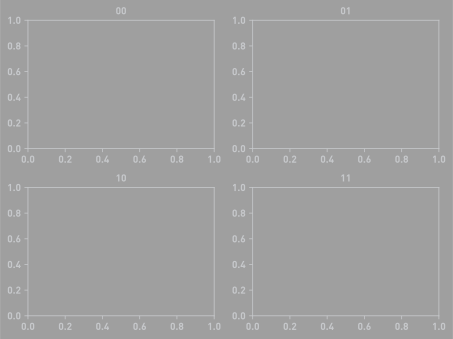

In [34]:
fig, ax = plt.subplots(2,2, facecolor='#9F9F9F')
ax[0][0].set_title('00', color='#C6C8CB', fontproperties=font2)
ax[1][0].set_title('10', color='#C6C8CB', fontproperties=font2)
ax[0][1].set_title('01', color='#C6C8CB', fontproperties=font2)
ax[1][1].set_title('11', color='#C6C8CB', fontproperties=font2)

ax[0][0].set_facecolor('#9F9F9F')
ax[1][0].set_facecolor('#9F9F9F')
ax[0][1].set_facecolor('#9F9F9F')
ax[1][1].set_facecolor('#9F9F9F')

# Change the params of both ticks and ticklegend
ax[0][0].tick_params(axis='x', colors='#C6C8CB')
ax[0][0].tick_params(axis='y', colors='#C6C8CB')
ax[1][0].tick_params(axis='x', colors='#C6C8CB')
ax[1][0].tick_params(axis='y', colors='#C6C8CB')
ax[0][1].tick_params(axis='x', colors='#C6C8CB')
ax[0][1].tick_params(axis='y', colors='#C6C8CB')
ax[1][1].tick_params(axis='x', colors='#C6C8CB')
ax[1][1].tick_params(axis='y', colors='#C6C8CB')

# Change the color of spines
for spine in 'bottom', 'left', 'top', 'right':
  ax[0][0].spines[spine].set_color('#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
  ax[1][0].spines[spine].set_color('#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
  ax[0][1].spines[spine].set_color('#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
  ax[1][1].spines[spine].set_color('#C6C8CB')

plt.tight_layout()

This method is useful when there are few plots; it is evident that, when having to configure the parameters of each subplot, the code we have to write is too long (although it is true that we could optimize it with some specific function).

Another way to deal with multiple plots is the use of the `add_subplot` method.

We are also playing with random colors from tColors list for the facecolor of the ax objects generated in the for loop

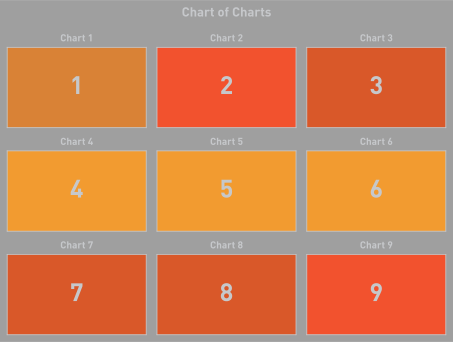

In [35]:
import random

tColors = ["#F29B30", "#D98236", "#F27329", "#D95829", '#F2522E']

fig = plt.figure(facecolor='#9F9F9F')

for i in range(1,10):
  ax = fig.add_subplot(3,3,i)
  for spine in 'bottom', 'left', 'top', 'right':
    ax.spines[spine].set_color('#C6C8CB')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_facecolor(random.choice(tColors))
  ax.text(0.5,0.5,
          s=str(i),
          ha='center',
          va='center',
          fontproperties=font2,
          fontsize=25,
          color='#C6C8CB')
  ax.set_title(f'Chart {i}', fontproperties=font2, color='#C6C8CB')

fig.suptitle('Chart of Charts', fontproperties=font2, color='#C6C8CB', fontsize=13)
plt.tight_layout(rect=(0,0,1,1))
plt.savefig('chartOfCharts.pdf', bbox_inches='tight')

In the next plot, we are going to create a sample of points from a normal statistical distribution. We define the position in the grid for each axis figure.

Instead of using a `for` loop, as we want different sized subplots, we are defining the position and the number of parts of the grid each subplot occupies.

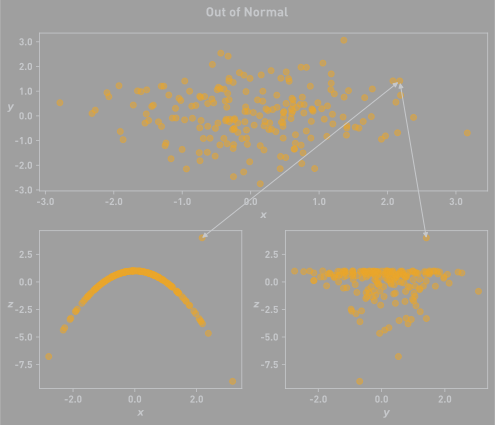

In [36]:
from matplotlib.patches import ConnectionPatch

fig = plt.figure(figsize=(7,6), facecolor='#9F9F9F')

# Generate random data
n = 200
x = np.random.normal(size = n)
y = np.random.normal(size = n)
z = np.concatenate([np.array([4]), 1- x[1:]**2])

formatter = FuncFormatter(lambda x, pos: "{:.1f}".format(x))


ax12 = fig.add_subplot(2,2,(1,2), facecolor='#9F9F9F')
ax12.scatter(x,y,alpha = 0.5, color='#EBA62A')
ax12.tick_params(axis='x', colors='#C6C8CB')
ax12.tick_params(axis='y', colors='#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
    ax12.spines[spine].set_color('#C6C8CB')

ax12.xaxis.set_major_formatter(formatter)
ax12.yaxis.set_major_formatter(formatter)

ax3 = fig.add_subplot(2,2,3, facecolor='#9F9F9F')
ax3.scatter(x,z,alpha = 0.5, color='#EBA62A')
ax3.tick_params(axis='x', colors='#C6C8CB')
ax3.tick_params(axis='y', colors='#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
    ax3.spines[spine].set_color('#C6C8CB')

ax3.xaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)

ax4 = fig.add_subplot(2,2,4, facecolor='#9F9F9F')
ax4.scatter(y,z,alpha = 0.5, color='#EBA62A')
ax4.tick_params(axis='x', colors='#C6C8CB')
ax4.tick_params(axis='y', colors='#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
    ax4.spines[spine].set_color('#C6C8CB')

ax4.xaxis.set_major_formatter(formatter)
ax4.yaxis.set_major_formatter(formatter)

con = ConnectionPatch(
    xyA = (x[0], y[0]),
    coordsA = ax12.transData,
    xyB = (x[0], z[0]),
    coordsB = ax3.transData,
    arrowstyle = '<|-|>',
    shrinkA = 2,
    shrinkB = 0,
    color = '#C6C8CB')
fig.add_artist(con)

con = ConnectionPatch(
    xyA = (x[0], y[0]),
    coordsA = ax12.transData,
    xyB = (y[0], z[0]),
    coordsB = ax4.transData,
    arrowstyle = '<|-|>',
    shrinkA = 2,
    shrinkB = 0,
    color = '#C6C8CB')
fig.add_artist(con)

ax12.set_xlabel('$x$', color = '#C6C8CB')
ax12.set_ylabel('$y$', color = '#C6C8CB', rotation=0)

ax3.set_xlabel('$x$', color = '#C6C8CB')
ax3.set_ylabel('$z$', color = '#C6C8CB', rotation=0)

ax4.set_xlabel('$y$', color = '#C6C8CB')
ax4.set_ylabel('$z$', color = '#C6C8CB', rotation=0)


fig.suptitle('Out of Normal', fontproperties=font2, color='#C6C8CB', fontsize=13)

plt.tight_layout()
plt.savefig('outOfnormal.pdf', bbox_inches='tight');

Let's create a figure of different aspects of the von Mises distribution, which is a continuous probability distribution on the unit circle. We are using another method with `plt.GridSpec()`.

This method is better for irregular plot grids.

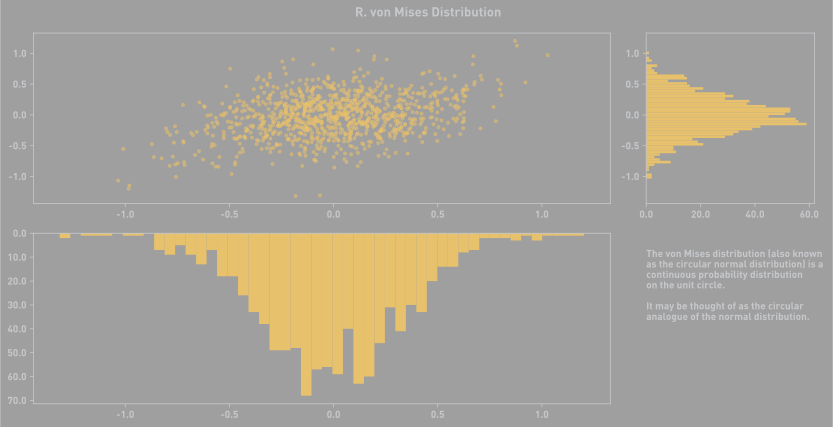

In [37]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,6),facecolor='#9F9F9F')

# Create a custom formatter for the x and y axis ticks
formatter = FuncFormatter(lambda x, pos: "{:.1f}".format(x))

# Create a grid of 2x4 subplots and place the subplots in the grid
spec = gridspec.GridSpec(ncols=4,
                         nrows=2,
                         figure=fig)

# Generate smaples of the probability density for the von Mises distribution
mu, kappa = 0.0, 10.0 # Mean and Dispersion
x = np.random.vonmises(mu, kappa, 1000)
y = x**3 + np.random.vonmises(mu, kappa, 1000)

# Plot the samples using a scatter plot
ax1 = fig.add_subplot(spec[0, 0:3], facecolor='#9F9F9F')
ax1.plot(x,y,
         linestyle='None',
         marker='.',
         alpha=0.5,
         color='#E8C16D')
ax1.tick_params(axis='x', colors='#C6C8CB') # Set the color of the x-axis ticks
ax1.tick_params(axis='y', colors='#C6C8CB') # Set the color of the y-axis ticks
# Set the color of the spines
for spine in 'bottom', 'left', 'top', 'right':
    ax1.spines[spine].set_color('#C6C8CB')

ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

ax2 = fig.add_subplot(spec[1, 0:3], sharex = ax1, facecolor='#9F9F9F')
ax2.hist(y, orientation='vertical', bins=50, color='#E8C16D')
ax2.invert_yaxis()
ax2.tick_params(axis='x', colors='#C6C8CB')
ax2.tick_params(axis='y', colors='#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
    ax2.spines[spine].set_color('#C6C8CB')

ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

ax3 = fig.add_subplot(spec[0, 3:4], sharey = ax1, facecolor='#9F9F9F')
ax3.hist(x, orientation='horizontal', bins=50, color='#E8C16D')
ax3.tick_params(axis='x', colors='#C6C8CB')
ax3.tick_params(axis='y', colors='#C6C8CB')
for spine in 'bottom', 'left', 'top', 'right':
    ax3.spines[spine].set_color('#C6C8CB')

ax3.xaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)

# Get the dimensions of ax3
bbox = ax3.get_position()
width, height = bbox.width, bbox.height

# Create a new subplot in the empty part of the grid
ax4 = fig.add_subplot(spec[1, 3:4], facecolor='#9F9F9F')



# Add the text to the subplot
text = 'The von Mises distribution (also known \nas the circular normal distribution) is a \ncontinuous probability distribution \non the unit circle. \n\nIt may be thought of as the circular \nanalogue of the normal distribution.'
ax4.text(0, 0.5, text,
         color='#C6C8CB',  # same color as the ticks
         ha='left',  # horizontal alignment
         # vertical alignment
         wrap=True)  # wrap text in a box


# Hide the x and y axis
ax4.axis('off')

fig.suptitle('R. von Mises Distribution', fontproperties=font2, color='#C6C8CB', fontsize=13, x=0.5, y=0.98)

plt.tight_layout()
plt.savefig('vonMisesDist.pdf', bbox_inches='tight');

### Averages, Averages, Averages... Times, they are changing.

As a corollary to this notebook we are going to make a complex plot, where we will test all the methods used above.
Although the data are different, the type of graph we will develop is based, at least formally, on a New York Times article by Ben Casselman and Ella Koeze: "The Pandemic Changed How We Spent Our Time".

We are going to make it in three parts, in order to be able to reuse it for other models.

First we will define the styles of the graph. Secondly we will write the function that generates the graph and finally we will indicate the data and the texts that define it.

In [38]:
from google.colab import files
uploaded = files.upload()

Saving kChangesMatplotLibStyles.mplstyle to kChangesMatplotLibStyles.mplstyle
